In [34]:
## Basic Information
# conda env: c-news

## In case I need
# from dotenv import load_dotenv
# load_dotenv()

## Requirements
%pip install -r requirements.txt

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/3f/05/acb6e525ac40c2238aaeee89567a579f93b769941dc7ff2ac9af17390b23/scikit_learn-1.3.1-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.3.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.1-cp312-cp312-macosx_12_0_arm64.whl (9.3 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


## Some basics
Run this to download today's top stories

In [1]:
top_stories_url = "https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRFZxYUdjU0FtVnVHZ0pWVXlnQVAB?hl=en-US&gl=US&ceid=US:en"
run_todays = True

In [2]:
import requests
import datetime
import csv
from bs4 import BeautifulSoup

# Define a function to scrape data
def scrape_website(url):
    # Fetch the content of the webpage
    response = requests.get(url)
    response.raise_for_status()  # Raises an exception for HTTP errors
    
    # Parse the webpage content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    titles = []
    for td in soup.find_all('h4', class_='gPFEn'):
        titles.append(td.get_text(strip=True))  # strip=True helps remove leading/trailing whitespace
    
    return titles

today = datetime.date.today()
filename = f"data/{str(today)}.csv"
# filename = "data/2023-10-10.csv"

if run_todays:
    titles = scrape_website(top_stories_url)
    # Writing to csv file
    with open(filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        for item in titles:
            csvwriter.writerow([item])
    run_todays = False
else:
    titles = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            titles.append(row[0])

print(titles)

['Israel-Hamas war: Israel bombs Gaza where civilians sought refuge', 'Israel-Hamas War: Israelis and Palestinians Blame Each Other for Blast at Gaza Hospital That Killed Hundreds', 'Abbas said to cancel meeting with Biden tomorrow after Gaza hospital blast', "'Bombing a hospital is a war crime': Oxfam", 'Jim Jordan loses first vote for House speaker amid GOP defections', 'Jim Jordan fails to win the speakership on first ballot', 'As Fulcher, Simpson consider speaker vote on Jordan, consider his many past betrayals | Opinion', 'Opinion | The Apotheosis of Jim Jordan Is a Sight to Behold', 'Oil prices slip ahead of Biden Middle East trip', 'Biden heading to Israel, Jordan', "President Biden's departure for Israel to show support", "Donald Trump: Biden's Weakness and Incompetence Strengthened Iran—and Hamas", "Alec Baldwin may face involuntary manslaughter charge in 'Rust' shooting; prosecutors investigating recommend to grand jury", "Alec Baldwin could face new criminal charges as 'Rust

In [3]:
## alternatively, load everything from the data folder into one array
import csv
import os

# Directory path
data_folder = "data"
# List all files in the directory
file_names = [f for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f)) and f.endswith('.csv')]

# Initialize empty list to store titles
all_titles = []

# Loop through each file and read titles
for file_name in file_names:
    with open(os.path.join(data_folder, file_name), 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            all_titles.append(row[0])

print(all_titles)
len(all_titles)


['House Republicans in disarray as Jim Jordan hunts for enough votes to be speaker', 'Jim Jordan nominated for House speaker by Republicans as divisions remain', 'Jim Jordan Nominated for House Speaker by Divided G.O.P.', 'BREAKING: Rep. Jim Jordan wins Republican speaker nomination', 'Palestinians evacuate as Gaza braces for Israel ground attack', 'Israel’s evacuation order to northern Gaza ‘impossible’, says UN - BBC News', 'Morning news brief', 'Opinion | Why Israel Must Reconsider Its Gaza Evacuation Order', "Iran-backed Hezbollah joining Israel-Hamas conflict would be a 'game changer,' Middle East expert says", 'Hezbollah takes responsibility for attacks on Israeli military posts along Lebanon border', 'Israeli military shells southern Lebanon in response to explosion at security fence', 'Who is Hezbollah: Will it join Israel war?', 'US colleges become flashpoints for protests on both sides of Israel-Hamas war', 'Israeli billionaire blasts Harvard leadership and quits board in pro

1809

In [5]:
import csv
import os
import pandas as pd

# Directory path
data_folder = "data"

# List all files in the directory
file_names = [f for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f)) and f.endswith('.csv')]

# Initialize an empty list to store titles and dates
data = []

# Loop through each file and read titles
for file_name in file_names:
    # Extract the date from the filename (assuming filename format is "YYYY-MM-DD.csv")
    date = file_name.replace('.csv', '')

    with open(os.path.join(data_folder, file_name), 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            # Append both the title and its date to the data list
            data.append([row[0], date])

# Convert the data list into a DataFrame
news = pd.DataFrame(data, columns=["Title", "Date"])

print(news.iloc[:, 0].values)
print(len(news))

['House Republicans in disarray as Jim Jordan hunts for enough votes to be speaker'
 'Jim Jordan nominated for House speaker by Republicans as divisions remain'
 'Jim Jordan Nominated for House Speaker by Divided G.O.P.' ...
 'Bose QuietComfort Ultra Headphones review: predictable excellence'
 'Bose QuietComfort Ultra headphones review: Moving in silence'
 'Bose QuietComfort Ultra Headphones Review: Sony Has Serious Competition']
1809


In [6]:
titles = news.iloc[:,0].values
titles

array(['House Republicans in disarray as Jim Jordan hunts for enough votes to be speaker',
       'Jim Jordan nominated for House speaker by Republicans as divisions remain',
       'Jim Jordan Nominated for House Speaker by Divided G.O.P.', ...,
       'Bose QuietComfort Ultra Headphones review: predictable excellence',
       'Bose QuietComfort Ultra headphones review: Moving in silence',
       'Bose QuietComfort Ultra Headphones Review: Sony Has Serious Competition'],
      dtype=object)

In [7]:
big_title_string = ' '.join(titles)
len(titles)

1809

In [11]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from nltk.tokenize import word_tokenize 

In [15]:
# Tokenize the string into words and remove non-alphabetic tokens
tokens = word_tokenize(big_title_string)
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Print first 10 words
words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaylahuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['house',
 'republicans',
 'disarray',
 'jim',
 'jordan',
 'hunts',
 'enough',
 'votes',
 'speaker',
 'jim']

In [17]:
# Load word2vec model (trained on an enormous Google corpus)
# takes about 20s 
# don't run this cell if not necessary
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews vectors.bin', binary = True) 

# Check dimension of word vectors
model.vector_size

300

## Testing on the word level
Don't need to run this again (except for imports)

In [105]:
titles = all_titles

In [62]:
## example of how this works
economy_vec = model['kayla']
economy_vec[:20] # First 20 components

array([-0.16601562, -0.07617188, -0.28125   ,  0.24414062,  0.12792969,
        0.03637695, -0.00349426, -0.3125    ,  0.08300781,  0.01953125,
       -0.16601562, -0.36914062, -0.15429688, -0.203125  ,  0.12695312,
        0.19824219,  0.18066406,  0.08056641, -0.10498047, -0.0703125 ],
      dtype=float32)

In [63]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.index_to_key]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.index_to_key]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
war,0.339844,0.304688,0.098633,0.167969,-0.056396,0.023315,0.273438,-0.244141,0.054199,0.210938,...,-0.199219,-0.230469,-0.161133,0.289062,0.062012,-0.131836,-0.137695,0.000153,0.082031,0.208984
live,0.016968,0.017334,-0.041748,0.126953,-0.021240,0.119141,0.087402,0.021851,-0.026001,0.176758,...,-0.067383,0.085449,-0.240234,0.215820,0.032959,-0.131836,-0.125000,-0.192383,0.177734,-0.304688
updates,-0.073730,-0.157227,-0.204102,0.005035,-0.097168,0.072266,0.143555,-0.243164,0.035400,-0.006104,...,0.330078,-0.029663,0.357422,-0.343750,0.359375,-0.071289,-0.208008,-0.153320,0.300781,-0.104004


In [64]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 250 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:250])

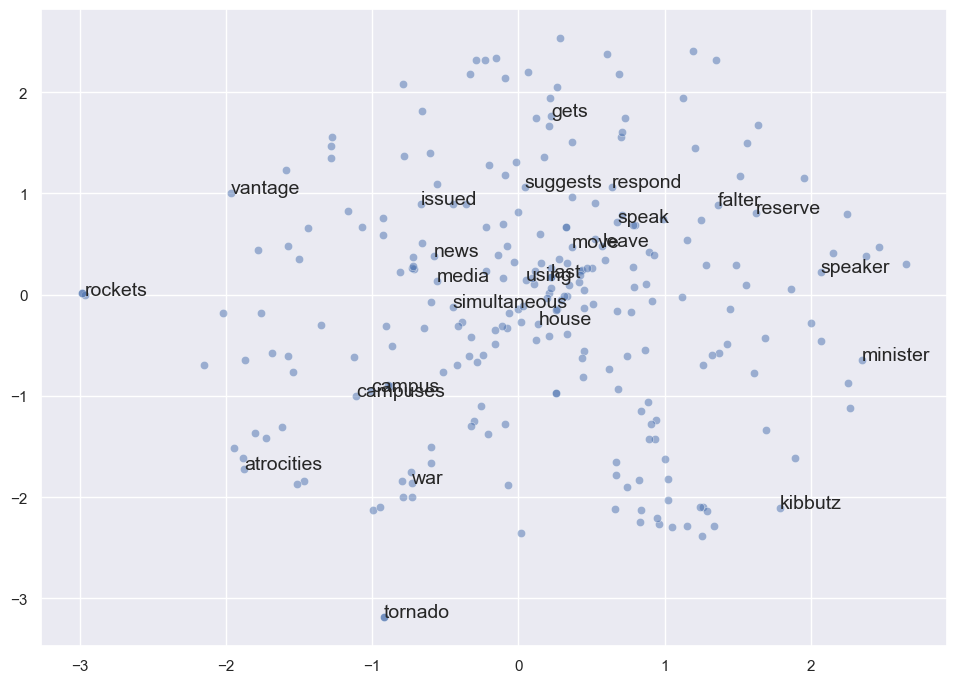

In [65]:
sns.set()

# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(x=tsne_df[:, 0], y=tsne_df[:, 1], alpha = 0.5)

# Labels
texts = []
words_to_plot = list(np.arange(0, 250, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))

plt.show()

## Title Level Mapping
Moving on from word-level mapping

### Prepping the corpus

In [18]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.index_to_key]
    return np.mean(model[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.index_to_key for word in doc)

# Filter out documents
def filter_docs(df, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = df.shape[0]
    
    df = df[df['Corpus'].apply(condition_on_doc)]

    print("{} docs removed".format(number_of_docs - df.shape[0]))

    return df

In [19]:
news.shape

(1809, 3)

In [20]:
# pre process the corpus
news["Corpus"] = news["Title"].apply(preprocess)

# Remove docs that don't include any words in W2V's vocab
news = filter_docs(news, lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
news = filter_docs(news, lambda doc: (len(doc) != 0))


0 docs removed
0 docs removed


In [21]:
# very crude method of screening for conflict-related news, only applicable to current circumstances, really
def ref_to_conflict(title):
    title = title.lower()
    keywords = ["war", "conflict", "attack", "civil", "siege", "coup", "violence", "airstrike"]
    country_keywords = ["Israel", "Gaza", "Palestine", "Palestinian", "Hamas", "Jew"]
    all_keywords = keywords + country_keywords

    for keyword in all_keywords:
        if keyword.lower() in title:
            return True
    return False

news["Conflict"]=news["Title"].apply(ref_to_conflict)

In [22]:
news

,Title,Date,Corpus,Conflict
0,House Republicans in disarray as Jim Jordan hu...,2023-10-13,"[house, republicans, disarray, jim, jordan, hu...",False
1,Jim Jordan nominated for House speaker by Repu...,2023-10-13,"[jim, jordan, nominated, house, speaker, repub...",False
2,Jim Jordan Nominated for House Speaker by Divi...,2023-10-13,"[jim, jordan, nominated, house, speaker, divided]",False
3,BREAKING: Rep. Jim Jordan wins Republican spea...,2023-10-13,"[breaking, jim, jordan, wins, republican, spea...",False
4,Palestinians evacuate as Gaza braces for Israe...,2023-10-13,"[palestinians, evacuate, gaza, braces, israel,...",True
...,...,...,...,...
1804,Letter to the editor: Don't be misled on Issue 1,2023-10-17,"[letter, editor, misled, issue]",False
1805,Bose QC Ultra Headphones Review: New ANC King?,2023-10-17,"[bose, qc, ultra, headphones, review, new, anc...",False
1806,Bose QuietComfort Ultra Headphones review: pre...,2023-10-17,"[bose, quietcomfort, ultra, headphones, review...",False
1807,Bose QuietComfort Ultra headphones review: Mov...,2023-10-17,"[bose, quietcomfort, ultra, headphones, review...",False


In [23]:
news["Vectors"] = news["Corpus"].apply(lambda x: document_vector(model, x))
# news["Vector mean"] = news["Vectors"].apply(np.mean)
X = np.vstack(news['Vectors'].values)

In [24]:
X.shape

(1809, 300)

### Reducing dimensions with tSNE
tSNE stands for **t-distributed stochastic neighbor embedding** (reference [here](https://distill.pub/2016/misread-tsne/))

the documentation for sklearn TSNE function is [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane. The algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions. 

A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

That’s not the end of the complications. The t-SNE algorithm doesn’t always produce similar output on successive runs, for example, and there are additional hyperparameters related to the optimization process.

In [38]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, init='random', random_state=10, perplexity=70)
# 50 or 70 work best for perp
tsne_df = tsne.fit_transform(X)

tsne_df


array([[ -1.1811118, -12.4664135],
       [ -2.0928626, -12.748849 ],
       [ -2.5318687, -12.653499 ],
       ...,
       [ 19.794397 ,  29.647589 ],
       [ 19.804598 ,  29.688341 ],
       [ 19.706512 ,  29.473114 ]], dtype=float32)

In [27]:
tsne_df.shape

(1809, 2)

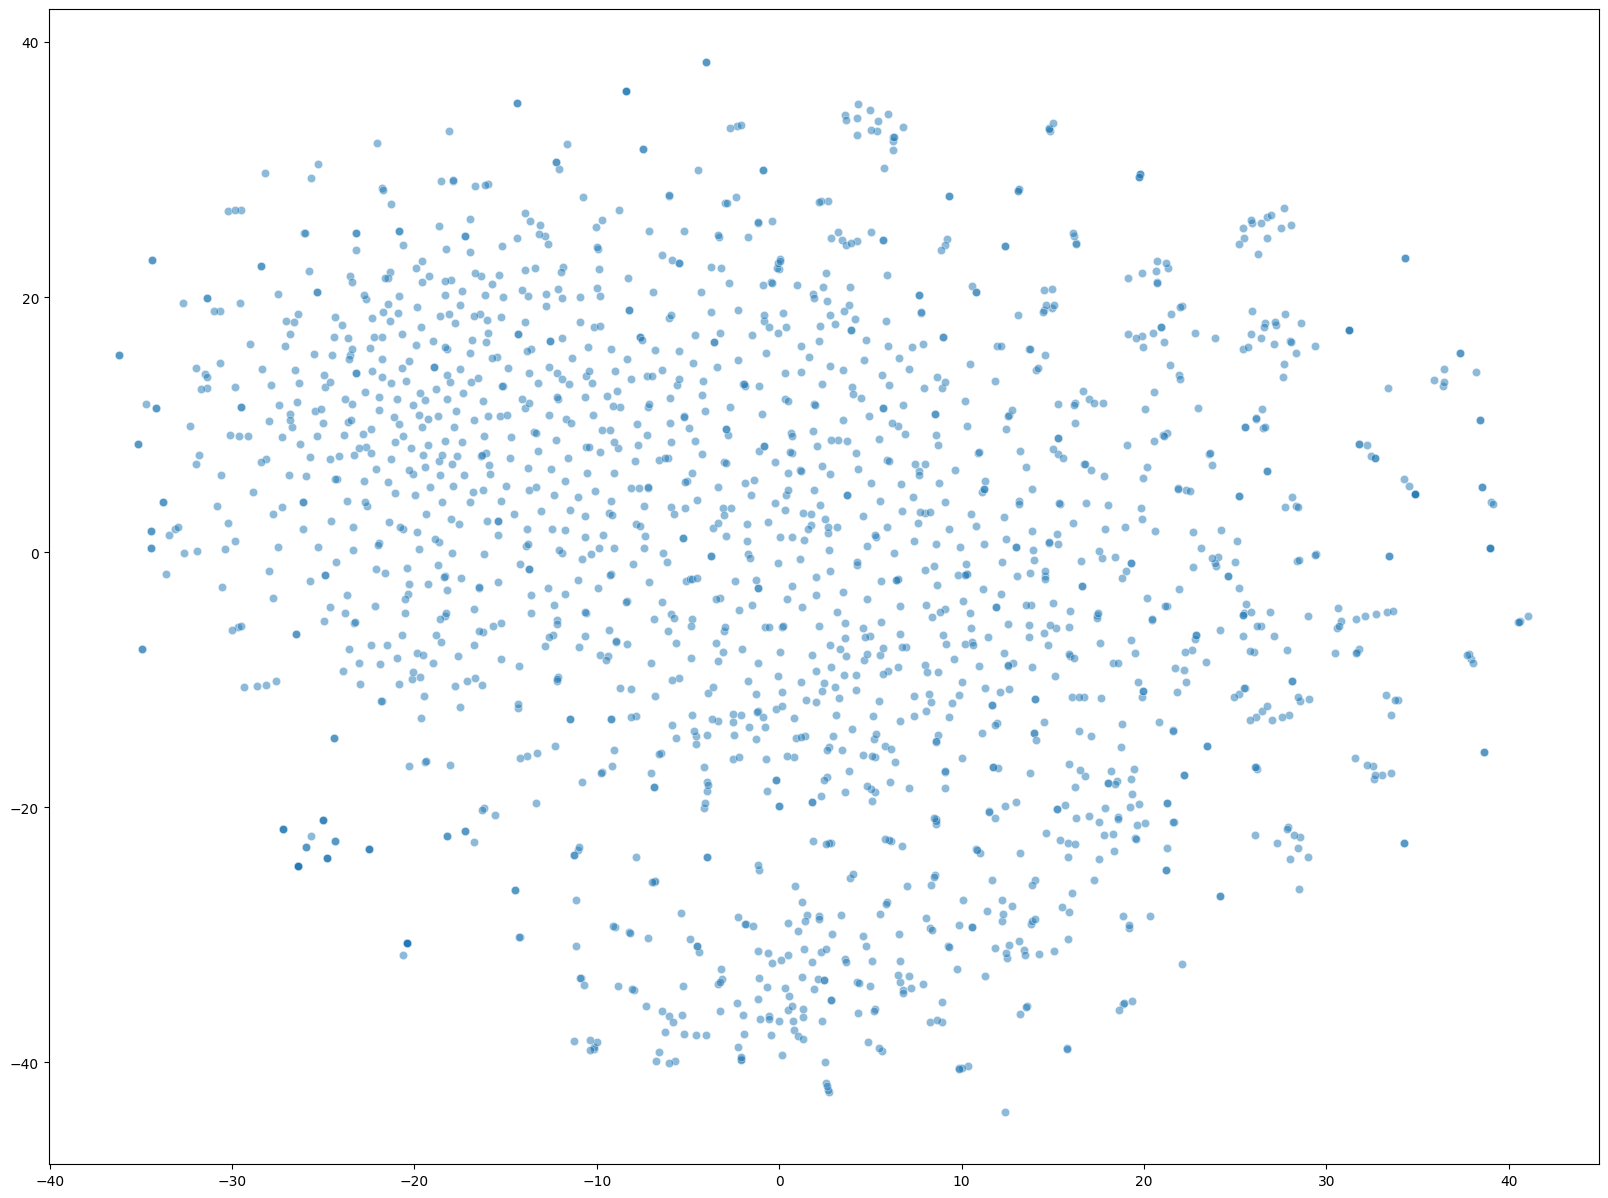

In [39]:
# Plots
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], alpha=0.5)

# texts = []
# titles_to_plot = list(np.arange(0, len(X), 30))

# # Append words to list
# for title in titles_to_plot:
#     texts.append(plt.text(tsne_df[title,0], tsne_df[title, 1], titles[title], fontsize=14))

plt.show()

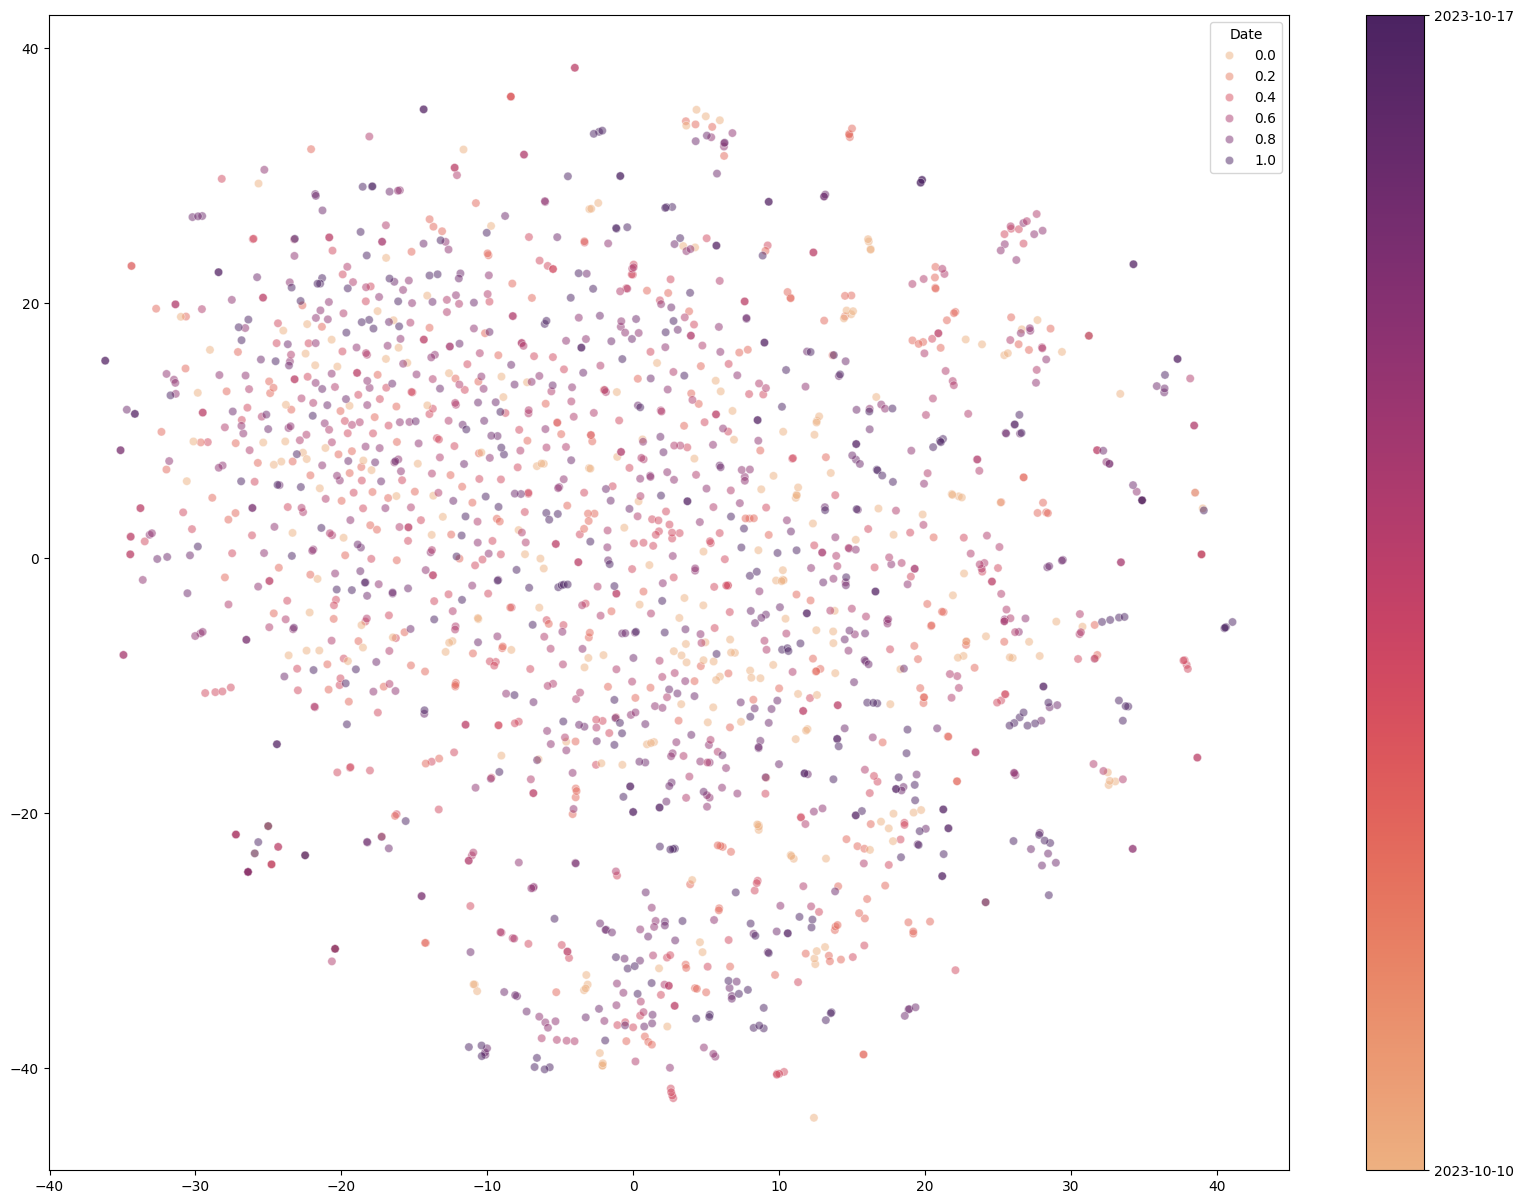

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.colors as mcolors

# Convert dates to ordinal numbers
dates = news['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
date_ordinal = dates.apply(lambda x: x.toordinal())

# Normalize the ordinal values to get them between 0 and 1
date_norm = (date_ordinal - date_ordinal.min()) / (date_ordinal.max() - date_ordinal.min())

# Create the scatter plot using the normalized date values as hue
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], hue=date_norm, palette="flare", alpha=0.5, ax=ax)

# Create a custom colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)
cbar.set_ticks([0, 1])
cbar.set_ticklabels([str(dates.min().date()), str(dates.max().date())])

plt.show()

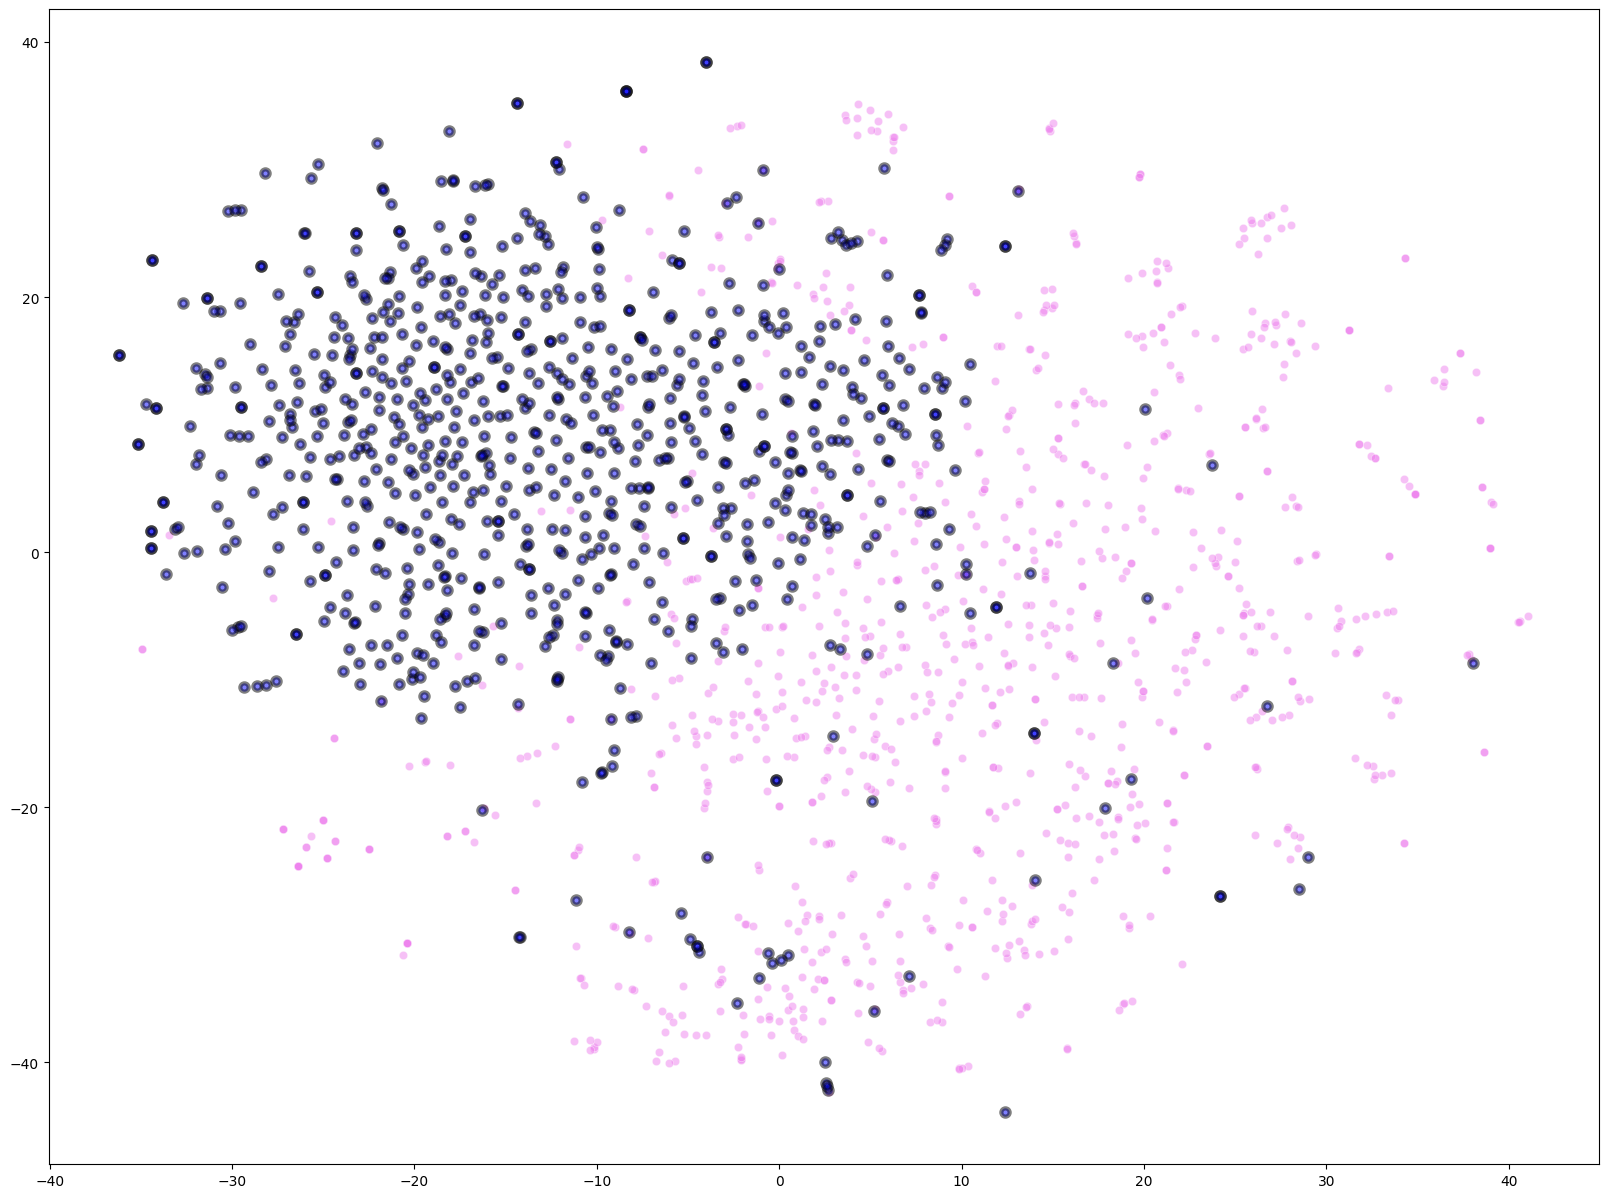

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Create a mask for the condition news["Conflict"] == True
conflict_mask = news["Conflict"].values
fig, ax = plt.subplots(figsize=(20, 15))

# Plot all points with the same color but different edgecolor based on the condition
sns.scatterplot(x=tsne_df[~conflict_mask, 0], y = tsne_df[~conflict_mask, 1], color="violet", alpha=0.5, ax=ax)
sns.scatterplot(x=tsne_df[conflict_mask, 0], y=tsne_df[conflict_mask, 1], color='blue', edgecolor='black', linewidth=3, alpha=0.5, ax=ax)

plt.show()
